In [21]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
years = 3    # Number of years
months = 12  # Number of months per year
quarters = 4 # Number of quarter per year
weeks = 4    # Number of weeks per month

In [23]:
df = pd.DataFrame(columns = ['date', 'value'])
start_date = date(2017,1,1)
end_date = start_date.replace(year=start_date.year + years)
time_series = pd.date_range(start = start_date, end = end_date, freq = 'D')
print(start_date, end_date, time_series.shape)

2017-01-01 2020-01-01 (1096,)


In [24]:
df['date'] = time_series
df.index = time_series
df.head()

,date,value
2017-01-01,2017-01-01,NaN
2017-01-02,2017-01-02,NaN
2017-01-03,2017-01-03,NaN
2017-01-04,2017-01-04,NaN
2017-01-05,2017-01-05,NaN


In [25]:
num_samples = time_series.shape[0]   # Number of samples in the Time Series
f_year = years                       # frequency for the year period
f_quarter = quarters*years           # frequency for the quarter period
f_week = weeks*months*years          # frequency for the week period

phi = np.pi/2       # phase shift -- > it moves the max of sin function to the first date of the year

t = np.linspace(0, num_samples, num_samples)

In [26]:
year_amp = 1
year_shift = 1
quarter_amp = 0.7
quarter_shift = 1
week_amp = 0.5
week_shift = 3
mix_shift = 1.5

y_year = year_amp*np.sin(2*np.pi*f_year*t + phi) + year_shift    # year seasonal part

y_quarter = quarter_amp*np.sin(2*np.pi*f_quarter*t + phi) + quarter_shift  # quarter seasonal part

y_week = week_amp*np.sin(2*np.pi*f_week*t + phi) + week_shift   # week seasonal part

noise = np.random.uniform(-1., 1., num_samples)   # noise part

y_mix = y_year + y_quarter + y_week + noise + mix_shift   # all series

# Plots

Year frequency 3
Quarter frequency 12
Week frequency 144


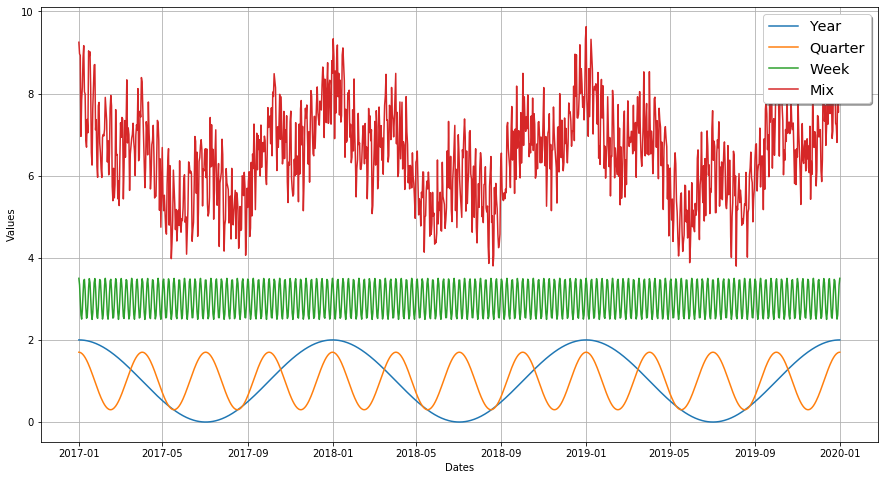

In [27]:
print("Year frequency", f_year)
print("Quarter frequency", f_quarter)
print("Week frequency", f_week)

fig, ax = plt.subplots(1, 1, figsize = (15, 8))
plt.ylabel('Values')
plt.xlabel('Dates')
plt.grid(True, which = 'both')

plt.plot(time_series, y_year, label = 'Year')
plt.plot(time_series, y_quarter, label = 'Quarter')
plt.plot(time_series, y_week, label = 'Week')
plt.plot(time_series, y_mix, label = 'Mix')

plt.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()

In [53]:
#   Fourier Transform (DFT) of a real-valued array 
#   by means of an efficient algorithm called the Fast Fourier Transform (FFT)

N = num_samples # the length of input array

spectrum = np.fft.rfft(y_week)

orig = spectrum.copy()

#   Return the Discrete Fourier Transform sample frequencies (for usage with rfft, irfft).
#   The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing 
#  (with zero at the start). 

freq = np.fft.rfftfreq(N, 1./N) #Frequency axis

spectrum = 1/N * np.abs(spectrum)

spectrum[1:] = spectrum[1:]*2 #  Double the amplitude value for all harmonics except for zero

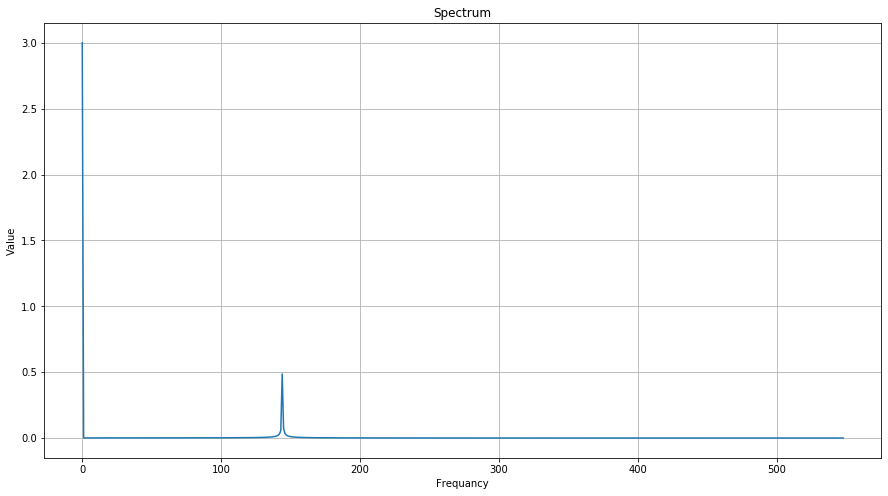

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq, spectrum)
plt.xlabel(u'Frequancy')
plt.ylabel(u'Value')
plt.title(u'Spectrum')
plt.grid(True)
plt.show()

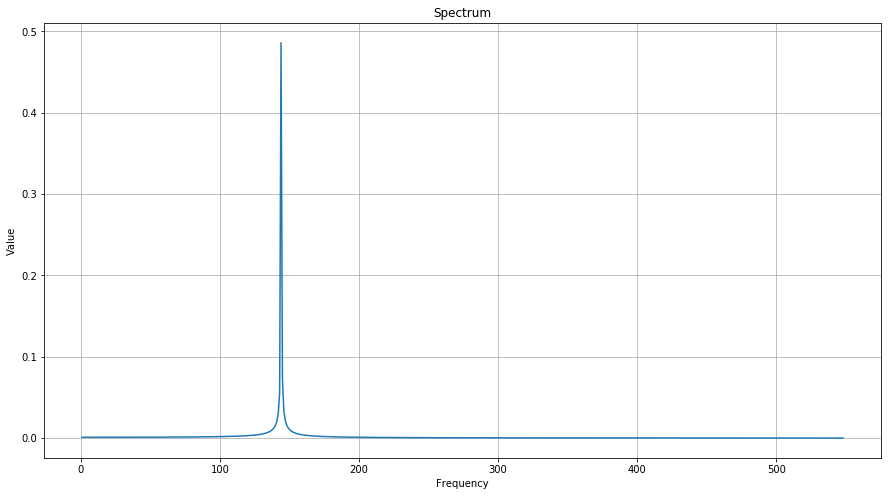

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq[1:], spectrum[1:])
plt.xlabel(u'Frequency')
plt.ylabel(u'Value')
plt.title(u'Spectrum')
plt.grid(True)
plt.show()

In [67]:
spectrum = np.fft.rfft(y_mix)

orig = spectrum.copy()

spectrum = 1/N * np.abs(spectrum)

spectrum[1:] = spectrum[1:]*2 #  Double the amplitude value for all harmonics except for zero

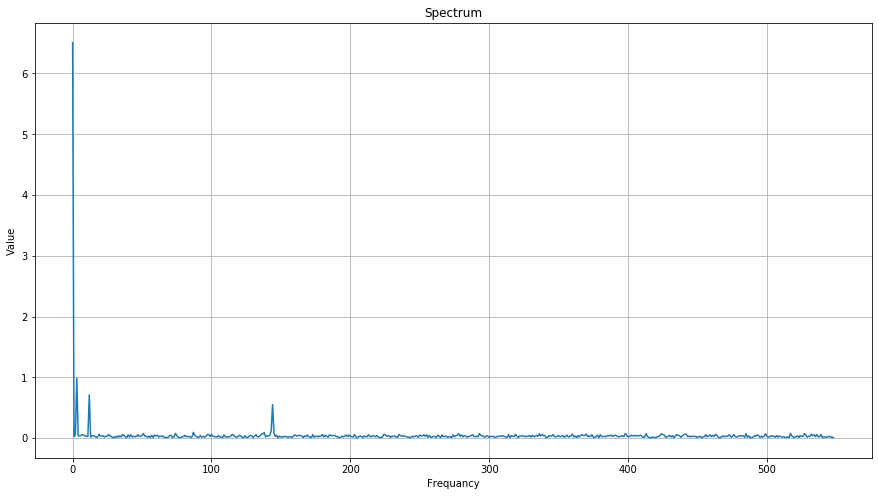

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq, spectrum)
plt.xlabel(u'Frequancy')
plt.ylabel(u'Value')
plt.title(u'Spectrum')
plt.grid(True)
plt.show()

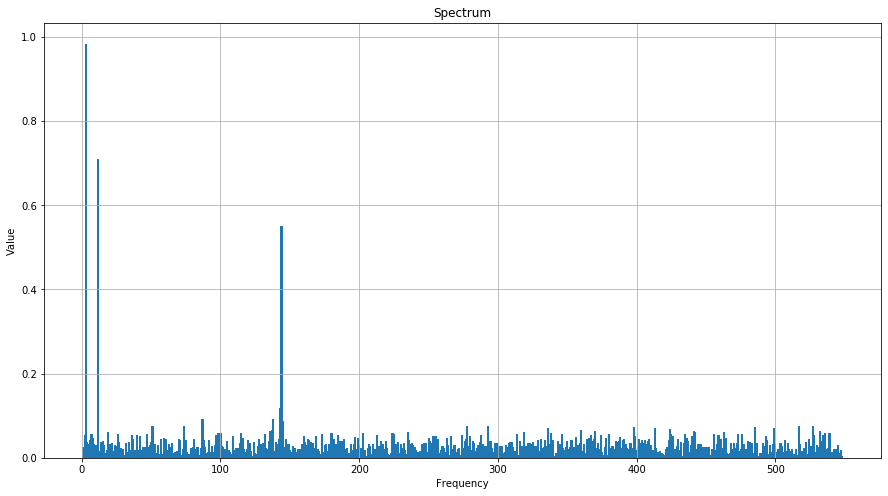

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.bar(freq[1:], spectrum[1:], width = 1.5)
plt.xlabel(u'Frequency')
plt.ylabel(u'Value')
plt.title(u'Spectrum')
plt.grid(True)
plt.show()

In [72]:
s = np.fft.irfft(orig)

Retrieved, not cleared from noise signal


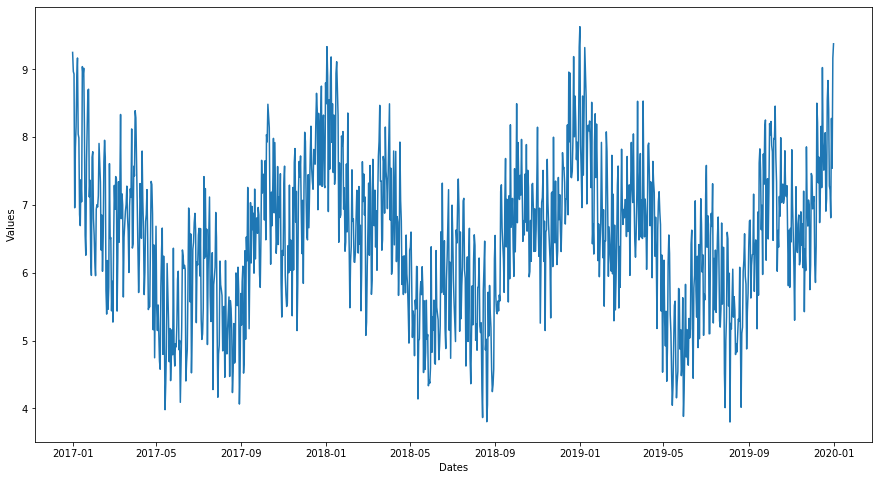

In [73]:
print("Retrieved, not cleared from noise signal")

fig, ax = plt.subplots(1, 1, figsize = (15, 8))
plt.ylabel('Values')
plt.xlabel('Dates')
plt.plot(time_series, s)
plt.show()

In [75]:
# clear sygnal from noise
# harmonics with amplitude less than 70 (value in original series before deviding amplitude by N)
orig_wo_noise = orig.copy()

orig_wo_noise[orig_wo_noise < 70] = 0

In [79]:
s_wo_noise = np.fft.irfft(orig_wo_noise)

Retrieved, cleared from noise signal


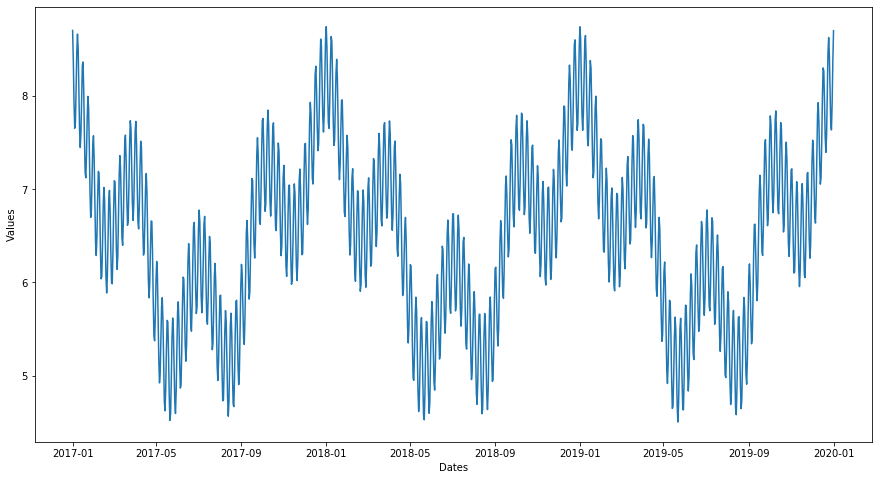

In [81]:
print("Retrieved, cleared from noise signal")

fig, ax = plt.subplots(1, 1, figsize = (15, 8))
plt.ylabel('Values')
plt.xlabel('Dates')
plt.plot(time_series, s_wo_noise)
plt.show()

Phase value


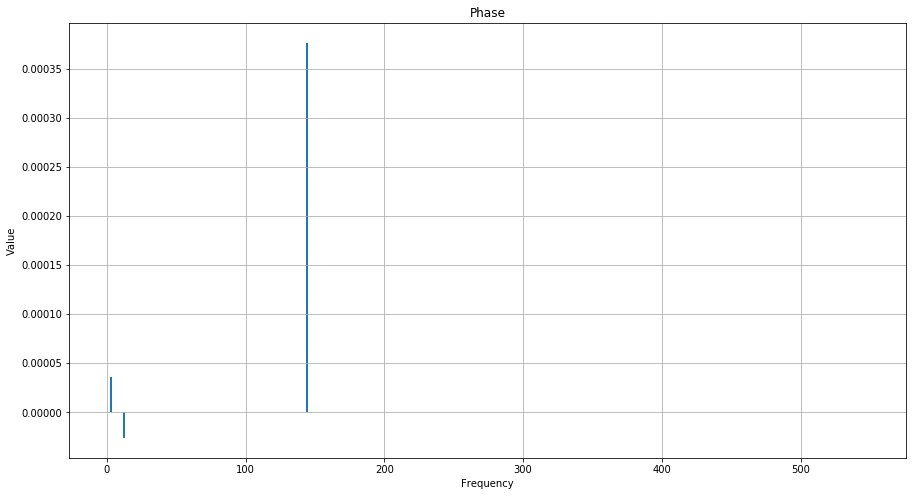

In [78]:
print("Phase value")

phs = 1/N * np.angle(orig_wo_noise)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.bar(freq[1:], phs[1:] , width=1.5)
plt.xlabel(u'Frequency')
plt.ylabel(u'Value')
plt.title(u'Phase')
plt.grid(True)
plt.show()